<a href="https://colab.research.google.com/gist/alexGrap/903ffd22e736d0969158a971db98dc71/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Анализ данных об играх
### 1) Данные

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.columns = data.columns.str.lower()

In [6]:
data.shape

(16715, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Как видим, в 6 колонках датасета из 11 присутствуют пустые значения, а некоторые признаки приведены к неправильному типу данных.  
Давайте это исправим! 

### 2) Препроцессинг данных

In [9]:
data[data['name'].isna() | data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
data = data.dropna(subset=['name'])

data['year_of_release'] = data['year_of_release'].fillna(data.groupby(by='name')['year_of_release'].transform('median'))
data = data.dropna(subset=['year_of_release'])
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y').dt.year

data['critic_score'] = data['critic_score'].fillna(-999).astype('int')

data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].fillna(-999).astype('float64')

data['rating'] = data['rating'].fillna('Not Rated')

data = data.drop_duplicates()

<ipython-input-10-7c6f5f308054>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y').dt.year
<ipython-input-10-7c6f5f308054>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['critic_score'] = data['critic_score'].fillna(-999).astype('int')
<ipython-input-10-7c6f5f308054>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [11]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis='columns')

In [12]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-999,-999.0,Not Rated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-999,-999.0,Not Rated,31.38


In [13]:
print('Наличие явных дубликатов в датасете: ', data.duplicated().value_counts())
print('Пропущенных значений в датасете:', data.isna().sum().sum())

Наличие явных дубликатов в датасете:  False    16567
dtype: int64
Пропущенных значений в датасете: 0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  int64  
 9   user_score       16567 non-null  float64
 10  rating           16567 non-null  object 
 11  total_sales      16567 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


Данные успешно зачищены от пустных ячеек и явных дубликатов.  
Сформирован новый признак суммарных продаж.

### 3) Анализ данных  
#### Выдвигаем следующую гипотезу: рассвет игровой индустрии приходится на конец 20-го века

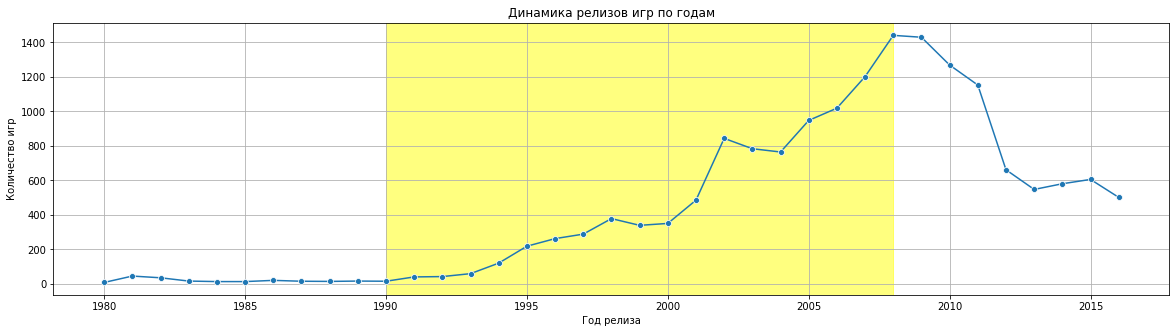

In [15]:
plt.figure(figsize=(20, 5))
plt.title('Динамика релизов игр по годам')
plt.ylabel('Количество игр')
plt.xlabel('Год релиза')
plt.axvspan(1990, 2008, color='yellow', alpha=0.5)
plt.grid(True)
sns.lineplot(data=data.groupby('year_of_release')['name'].count(), marker='o')
plt.show()

####Исходя из данных графика мы получили подтверждение выдвинутой гипотезы.  
По графику видно, что игровая индустрия начала стремительно набирать обороты после 1990 года.  
Пик был достигнут в 2008 году, а далее количество выпускаемых игр пошло на спад.   
Вероятно, показатели пошли на снижение из-за мирового кризиса 2008 года, который повлиял и на игровую индустрию. 

In [28]:
data.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.092671,0.003914,-0.168242,0.037588,0.115998,0.184834,-0.076437
na_sales,-0.092671,1.000000,0.765529,0.450286,0.638700,0.110759,0.126416,0.941082
eu_sales,0.003914,0.765529,1.000000,0.435287,0.722693,0.125914,0.144644,0.901288
jp_sales,-0.168242,0.450286,0.435287,1.000000,0.291221,-0.069755,-0.054935,0.612689
other_sales,0.037588,0.638700,0.722693,0.291221,1.000000,0.134113,0.156427,0.749208
critic_score,0.115998,0.110759,0.125914,-0.069755,0.134113,1.000000,0.800752,0.101384
user_score,0.184834,0.126416,0.144644,-0.054935,0.156427,0.800752,1.000000,0.121346
total_sales,-0.076437,0.941082,0.901288,0.612689,0.749208,0.101384,0.121346,1.000000


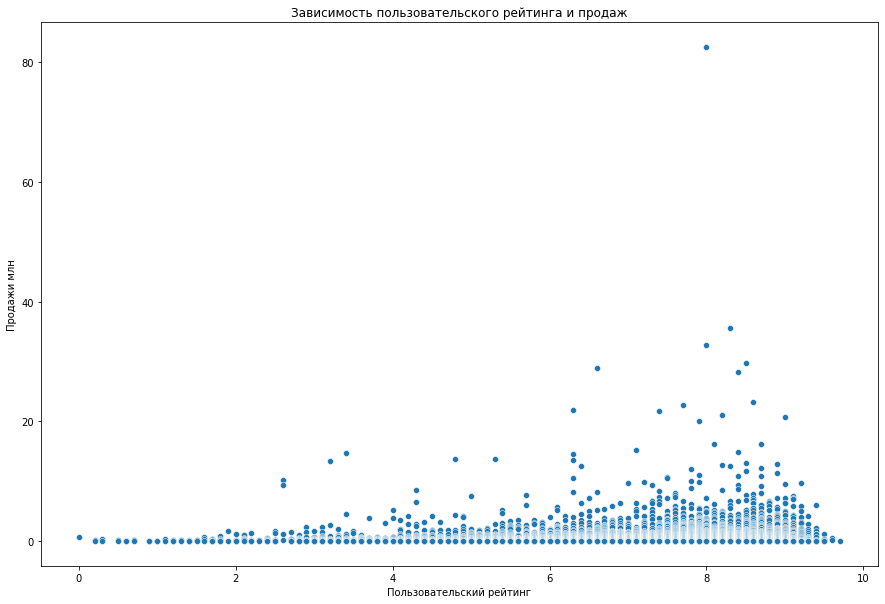

In [26]:
plt.figure(figsize=(15,10))
plt.title('Зависимость пользовательского рейтинга и продаж')
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Продажи млн')
sns.scatterplot(data=data, x=data[data['user_score'] != -999]['user_score'], y=data['total_sales'])
plt.show()

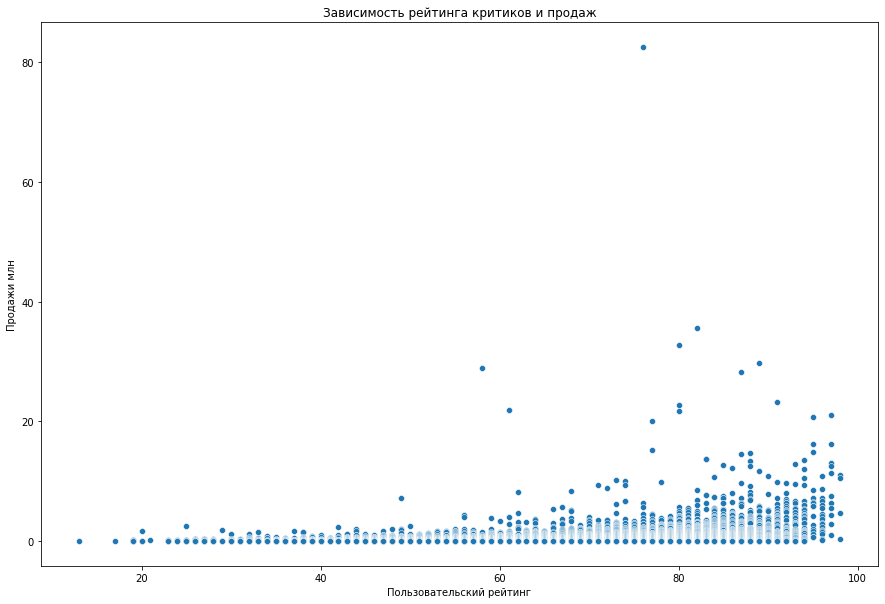

In [27]:
plt.figure(figsize=(15,10))
plt.title('Зависимость рейтинга критиков и продаж')
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Продажи млн')
sns.scatterplot(data=data, x=data[data['critic_score'] != -999]['critic_score'], y=data['total_sales'])
plt.show()

Из полученных графиков и корреляций можно отметить, что пользовательские оценки и оценки критиков незначительно сказываются на количестве продаж.